
| **`Column Name`:**              | **`Description`:** |
|--------------------------|-------------|
| `country`                | The name of the country where the data point was recorded. |
| `year`                   | The year the data was recorded (ranging from 1985 to 2016). |
| `sex`                    | The gender of the individuals (values: `male` or `female`). |
| `age`                    | The age group of the individuals (e.g., `15-24 years`, `35-54 years`, `75+ years`, etc.). |
| `suicides_no`            | The **total number of suicides** reported in that country, year, gender, and age group. |
| `population`             | The **total population** of that specific demographic group (country, year, sex, and age group). |
| `suicides/100k pop`      | The **suicide rate** per 100,000 people in the demographic group. This is a normalized value to allow for comparisons between populations of different sizes. |
| `country-year`           | A combined field used as a unique identifier in the format `"Country-Year"` (e.g., `India-2010`). |
| `HDI for year`           | The **Human Development Index (HDI)** for the country in that particular year. It is a composite index measuring average achievement in key dimensions of human development: life expectancy, education, and per capita income.  |
| ` gdp_for_year ($) `     | The **total GDP (Gross Domestic Product)** of the country for that year. |
| `gdp_per_capita ($)`     | The **GDP per capita**, i.e., GDP divided by the total population of the country for that year. |
| `generation`             | The **generation category** of the age group, such as `Generation Z`, `Millennials`, `Generation X`, etc. This adds a sociological dimension to the age data. |

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from data_preparation import data_loader
data= data_loader()

In [3]:
data.shape

(27820, 13)

In [4]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100kpop,country-year,HDIforyear,gdp_for_year(),gdp_per_capita(),generation,continent
0,Albania,1987,male,15-24,21,312900,6.71,Albania-1987,0.828088,2156624900,796,Generation X,Europe
1,Albania,1987,male,35-54,16,308000,5.19,Albania-1987,0.828088,2156624900,796,Silent,Europe
2,Albania,1987,female,15-24,14,289700,4.83,Albania-1987,0.828088,2156624900,796,Generation X,Europe
3,Albania,1987,male,75+,1,21800,4.59,Albania-1987,0.828088,2156624900,796,G.I. Generation,Europe
4,Albania,1987,male,25-34,9,274300,3.28,Albania-1987,0.828088,2156624900,796,Boomers,Europe


## **A. DESCRIPTIVE ANALYSIS:**

### **1. Total Suicides by Year:**

In [5]:
sus_year= data.groupby(by= "year")["suicides_no"].sum().reset_index()
sus_year

,year,suicides_no
0,1985,116063
1,1986,120670
2,1987,126842
3,1988,121026
4,1989,160244
5,1990,193361
6,1991,198020
7,1992,211473
8,1993,221565
9,1994,232063


<Axes: xlabel='year', ylabel='suicides_no'>

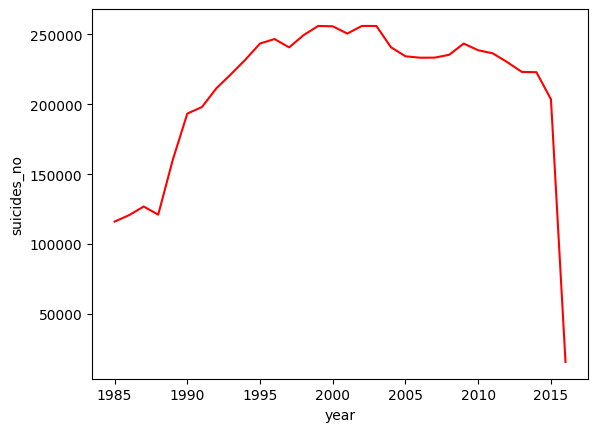

In [6]:
sns.lineplot(data= sus_year, x= "year", y= "suicides_no",color= "red")

This plot shows the global trend of total suicides (`suicides_no`) over the years (1985–2016).

- There is a significant increase in the total number of suicides from 1985 to around 2000. This could indicate worsening mental health conditions, better reporting mechanisms, or population growth or something else.

- From 2000 to 2010, the total suicides appear relatively stable, with minor fluctuations. This might suggest stagnation in addressing the issue or consistent reporting.

- A steep drop is observed after 2010, especially around 2015. This could be due to incomplete data for recent years, changes in reporting practices, or actual improvements in mental health interventions or some other factors.

**Two questions we have to answer:** 
1. Reasons or factors contributing to Sudden increase in number of suicides from 1985-2000.

2. Reasons of steep decline in the number of suicides after 2010.

<Axes: xlabel='year'>

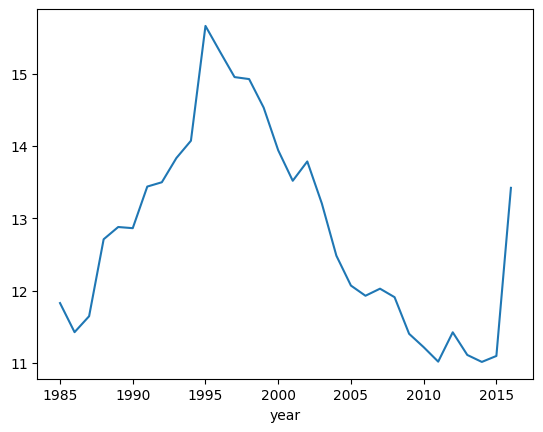

In [7]:
# Suicides per 100000 population:
nor_da= data.groupby("year")["suicides/100kpop"].mean()
sns.lineplot(x= nor_da.index, y= nor_da.values)

This plot shows the average suicide rate per 100,000 population (suicides/100k pop) over the years (1985–2016). 

The suicide rate per 100,000 population rises steadily from 1985, peaking around 2000 aligning with the earlier plot of total suicides, suggesting that the increase in suicides was not solely due to population growth but also a rise in the rate.

The rate begins to decline after 2000, with a significant drop between 2005 and 2010. But a sudden spike is observed after 2015,which was not seen in the previous plot.

Also, total suicides plot shows a sharp decline after 2010, while this plot shows a more gradual decline in the rate.

### 2. **Suicide Rate by Sex:**

In [8]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent'],
      dtype='object')

In [9]:
data["sex"].unique()

array(['male', 'female'], dtype=object)

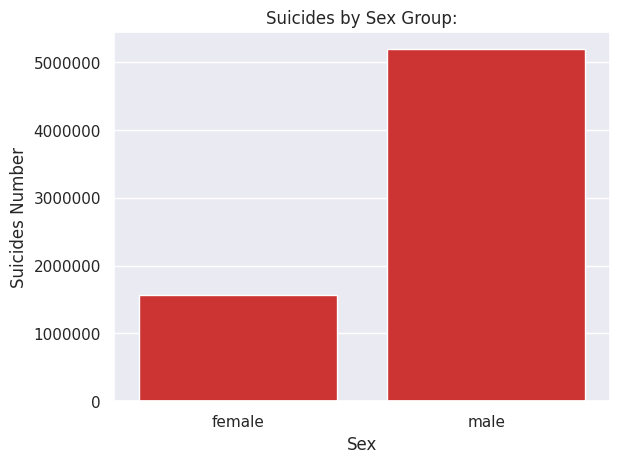

In [10]:
import matplotlib.ticker as mticker

sns.set_theme(style= "darkgrid")
data.groupby(by= "sex")["suicides_no"].sum()
sns.barplot(x= data.groupby(by= "sex")["suicides_no"].sum().index, y= data.groupby(by= "sex")["suicides_no"].sum().values, color= "Red", saturation= 0.6)
plt.xlabel("Sex")
plt.ylabel("Suicides Number")
plt.title("Suicides by Sex Group:")
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.show()

This plot shows the total `suicides number` according to `Sex`(`Female` and `Male`) for the whole dataset we have from `1985-2016`. 

This shows there is significantly high suicides in Males population compared to Females. This about 3 times more in Males compared to Females.

<Axes: xlabel='sex', ylabel='suicides/100kpop'>

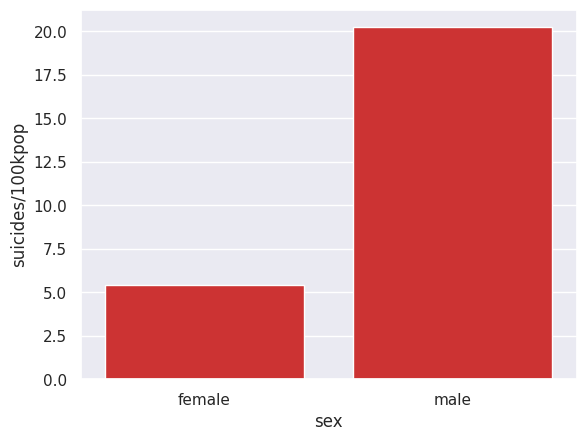

In [11]:
su_age= data.groupby(by= "sex")["suicides/100kpop"].mean().reset_index()
sns.barplot(data= su_age, x= "sex", y= "suicides/100kpop", color= "red", saturation= 0.6)

If we plot the suicides per 100k population for sex groups, it also shows that males suicide rate is significantly high (about 4 times) compared to females.

### 3. **Suicides by Age Group:**
- **How:** Group by `age`, sum `suicides_no`.
- **Inference:** Shows which age groups are most at risk; elderly and young adults often show patterns.


In [12]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent'],
      dtype='object')

In [13]:
su_age= data.groupby(by= "age")["suicides_no"].sum().reset_index().sort_values(by= "suicides_no")
su_age

,age,suicides_no
3,5-14,52264
5,75+,653118
0,15-24,808542
1,25-34,1123912
4,55-74,1658443
2,35-54,2452141


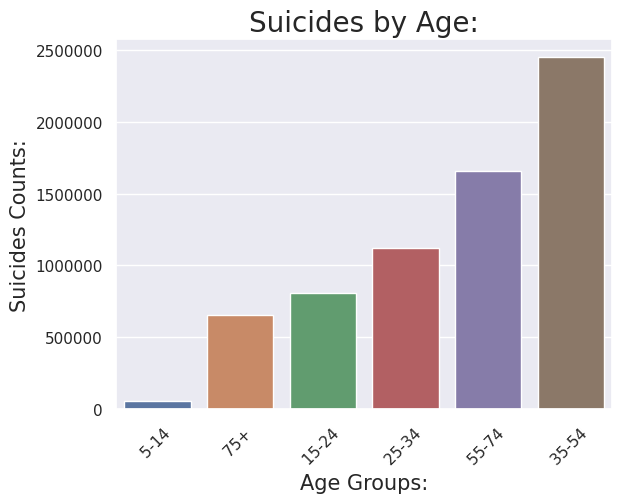

In [14]:
import matplotlib.pyplot as plt
sns.barplot(data= su_age, x= "age", y= "suicides_no", palette= "deep",saturation= 0.7, hue= "age", legend=False)
plt.title("Suicides by Age:", fontsize= 20)
plt.xlabel("Age Groups:", fontsize= 15)
plt.ylabel("Suicides Counts:", fontsize= 15)
plt.xticks(rotation= 45)   

plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.show()

- The `35–54` years age group has the highest number of suicides, indicating that middle-aged individuals are at the greatest risk. This could be due to factors like `work-related stress`, `financial pressures`, or `midlife crises`.

- The `55–74` years age group follows, suggesting that older adults also face significant challenges, possibly related to `health issues`, `loneliness`, or `retirement`.

- The `5–14` years age group has the lowest number of suicides, which is expected as children are generally less exposed to the stressors that lead to suicide.

- Middle-aged individuals (`35–54` years) are at the highest risk and should be a primary focus for mental health interventions. Older adults (`55–74` years) also require targeted support, especially for issues like isolation and health-related challenges.

- Young adults (`15–34` years) need attention for stress management and coping mechanisms, particularly in academic and early career stages.

<Axes: xlabel='age', ylabel='suicides/100kpop'>

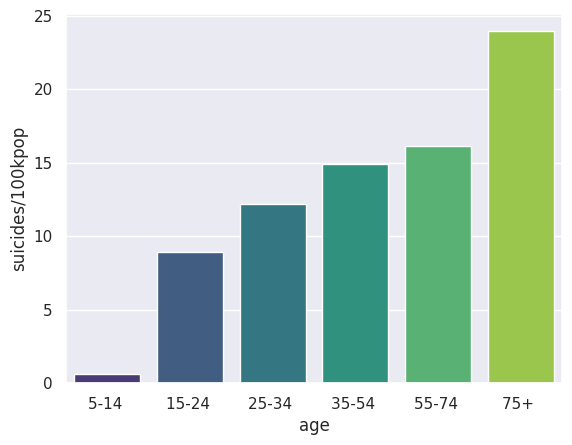

In [15]:
sus_by_100= data.groupby(by= "age")["suicides/100kpop"].mean().reset_index().sort_values(by= "suicides/100kpop")
sns.barplot(data= sus_by_100, x= "age", y= "suicides/100kpop", palette= "viridis", hue= "age", legend= False, )

This shows the **suicide rate per 100,000 population (`suicides/100kpop`)** across different **age groups**.

- The age group `75+` has the highest suicide rate, exceeding 20 suicides per 100,000 population. This suggests that elderly individuals are at the greatest risk. 

- The `35-54` and `55-74` age groups also show high suicide rates, around 15-20 suicides per 100,000 population. These groups may face challenges like work-related stress, financial pressures, or health-related issues.

- The `25-34` group has a moderate suicide rate, slightly above 10 per 100,000 population. The `15-24` group has a lower rate, around 10 per 100,000 population, but still significant, possibly due to academic or early career stress.

- The `5-14` age group has the lowest suicide rate, close to 0. This is expected, as children are generally less exposed to the stressors that lead to suicide.

> - ```Suicide rates increase with age, peaking in the elderly (`75+` years).```

> - ```Middle-aged and older adults require targeted mental health interventions.```

> - ```Young adults also need support, particularly for stress management and coping mechanisms.```

### 4. **Top Countries with Highest Suicide Rates:**

In [16]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent'],
      dtype='object')

In [17]:
chsr= data.groupby(by= "country")["suicides/100kpop"].mean().reset_index().sort_values(by= "suicides/100kpop", ascending= False).round(5)
chsr_10= chsr.head(10)
chsr_10

,country,suicides/100kpop
52,Lithuania,40.41557
87,Sri Lanka,35.29515
75,Russian Federation,34.89238
40,Hungary,32.76152
11,Belarus,31.07591
47,Kazakhstan,30.51128
51,Latvia,29.25933
84,Slovenia,27.82786
30,Estonia,27.27690
95,Ukraine,26.58232


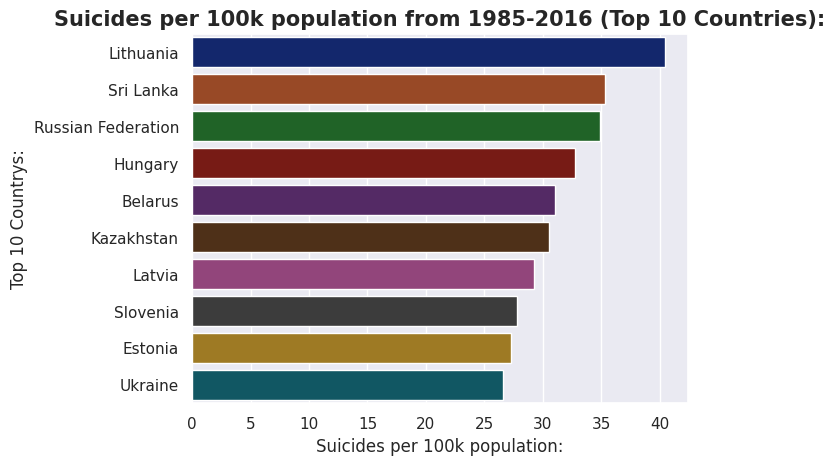

In [18]:
sns.barplot(data= chsr_10, x= "suicides/100kpop", y= "country", hue= "country", palette= "dark", legend= False, saturation= 0.7)
plt.title("Suicides per 100k population from 1985-2016 (Top 10 Countries):", fontsize= 15, fontweight= "bold")
plt.xlabel("Suicides per 100k population:", fontsize= 12)
plt.ylabel("Top 10 Countrys:", fontsize= 12)
plt.show()

`Lithuania` have the higest suicide rate per 100k population followed by `Sri Lanka`, `Russia` and `Hungary`.

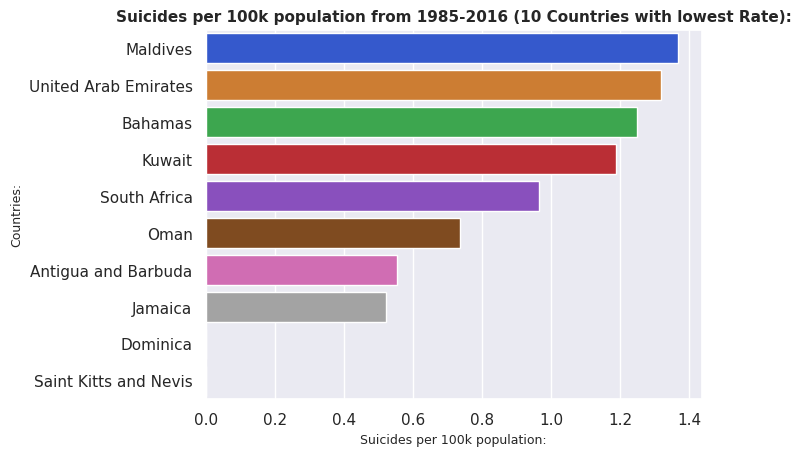

In [19]:
sns.barplot(data= chsr.tail(10), x= "suicides/100kpop", y= "country", hue= "country", palette= "bright", legend= False, saturation= 0.6)
plt.title("Suicides per 100k population from 1985-2016 (10 Countries with lowest Rate):", fontsize= 11, fontweight= "bold")
plt.xlabel("Suicides per 100k population:", fontsize= 9)
plt.ylabel("Countries:", fontsize= 9)
plt.show()

`Dominicia` and, `Saint Kitts and Navis` have the lowest Suicides rates, almost zero per 100k population.

In [20]:
sas= data.groupby(by= "country")["suicides_no"].mean().reset_index().sort_values(by= "suicides_no", ascending= False).round(2)
sas

,country,suicides_no
75,Russian Federation,3733.77
98,United States,2779.60
46,Japan,2169.09
95,Ukraine,952.23
35,Germany,933.53
...,...,...
37,Grenada,0.12
79,San Marino,0.11
1,Antigua and Barbuda,0.03
27,Dominica,0.00


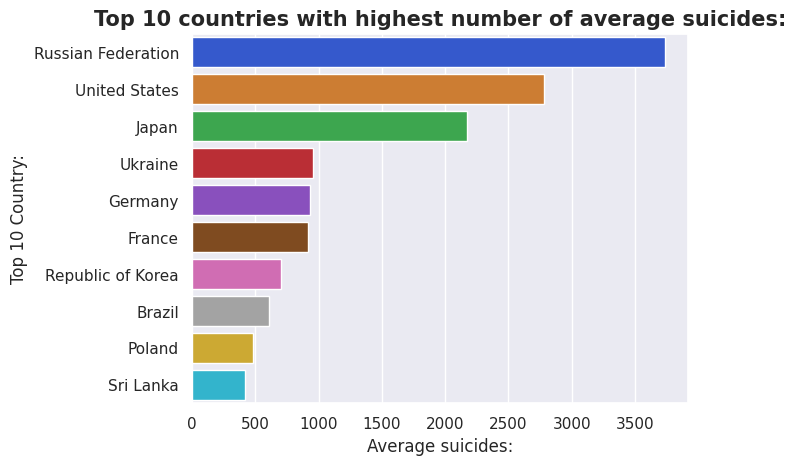

In [21]:
sns.barplot(data= sas.head(10), x= "suicides_no", y= "country", palette= "bright", hue= "country", legend= False, saturation= 0.6)
plt.title("Top 10 countries with highest number of average suicides:", fontsize= 15, fontweight= "bold")
plt.xlabel("Average suicides:", fontsize= 12)
plt.ylabel("Top 10 Country:", fontsize= 12)
plt.show()

If we analyze the data according to `suicides_no` without population consideration, then, `Russia` has the higest number of suicides records followed by `USA`, `Japan` and `Ukrain`.

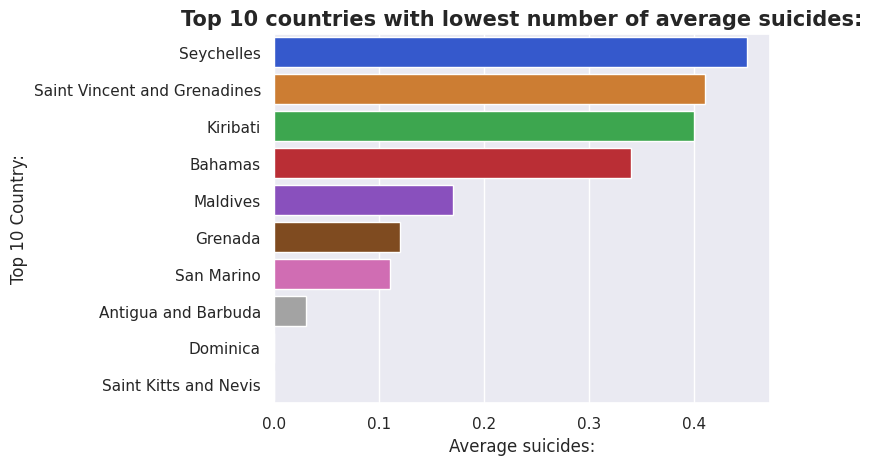

In [22]:
sns.barplot(data= sas.tail(10), x= "suicides_no", y= "country", palette= "bright", hue= "country", legend= False, saturation= 0.6)
plt.title("Top 10 countries with lowest number of average suicides:", fontsize= 15, fontweight= "bold")
plt.xlabel("Average suicides:", fontsize= 12)
plt.ylabel("Top 10 Country:", fontsize= 12)
plt.show()

And, `Antigua and Barbuda`, `Dominica`, `Saint Kitts and Navis` have the lowest number of suicides without considering the population size.

It is more reliable to analyze the `suicides rates with population size consideration` rather than `using only the number of suicides per country`.

### 5. **Bottom Countries with Lowest Suicide Rates:**

In [23]:
chsr= chsr.sort_values(by= "suicides/100kpop", ascending= True)

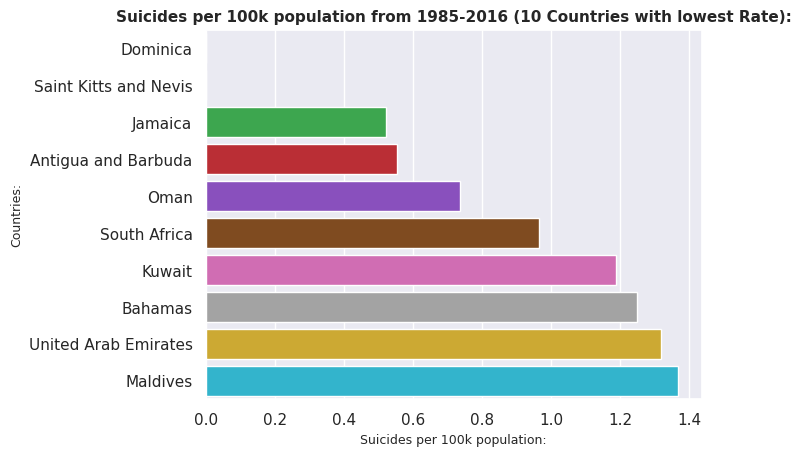

In [24]:
sns.barplot(data= chsr.head(10), x= "suicides/100kpop", y= "country", hue= "country", palette= "bright", legend= False, saturation= 0.6)
plt.title("Suicides per 100k population from 1985-2016 (10 Countries with lowest Rate):", fontsize= 11, fontweight= "bold")
plt.xlabel("Suicides per 100k population:", fontsize= 9)
plt.ylabel("Countries:", fontsize= 9)
plt.show()

`Sant Kitts and Nevis` and, `Dominica` have 0.00 rate of suicides per 100k population. according to 2023 data, `Saint Kitts and Nevis` had a population of approximately `52,321`, while `Dominica` had a population of roughly `73,000`.  

The low suicide rates in `Saint Kitts and Nevis` and `Dominica` can be attributed to several factors:

1. **Strong Community Ties:**    
    Both countries have close-knit communities where social support is prevalent. Strong family and community bonds can provide emotional and psychological support to individuals in distress.

2. **Cultural Influences:**      
    Cultural norms in these nations often emphasize resilience, community solidarity, and a collective approach to problem-solving, which can help mitigate feelings of isolation.

3. **Religious and Spiritual Beliefs:**    
    High levels of religious affiliation and spiritual practices in the Caribbean can offer comfort and hope, encouraging individuals to seek help and maintain a positive outlook.

4. **Access to Mental Health Resources:**    
    While resources may be limited, there is a growing awareness of mental health issues, and initiatives to improve access to mental health support can contribute to lower suicide rates.

5. **Economic Factors:**   
    Although both countries face economic challenges, the reliance on tourism and community support systems may buffer against extreme financial distress, which is often linked to higher suicide rates.

----
----

## **B. TEMPORAL/TREND ANALYSIS:**

### 6. **Trend of Suicides over the Years per Country:**

In [25]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent'],
      dtype='object')

In [26]:
data.groupby(by= "country")["suicides_no"].sum().reset_index()

,country,suicides_no
0,Albania,1970
1,Antigua and Barbuda,11
2,Argentina,82219
3,Armenia,1905
4,Aruba,101
...,...,...
96,United Arab Emirates,622
97,United Kingdom,136805
98,United States,1034013
99,Uruguay,13138


In [27]:
a= data.groupby(by= "country")["suicides_no"].sum().reset_index().sort_values(by= "suicides_no", ascending= False)
a

,country,suicides_no
75,Russian Federation,1209742
98,United States,1034013
46,Japan,806902
33,France,329127
95,Ukraine,319950
...,...,...
55,Maldives,20
1,Antigua and Barbuda,11
79,San Marino,4
27,Dominica,0


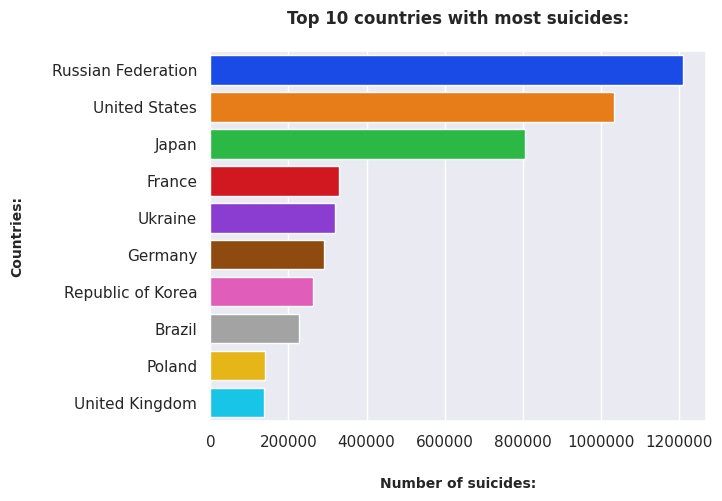

In [28]:
sns.barplot(data= a.head(10), y= "country", x= "suicides_no", hue= "country", legend= False, palette="bright", saturation=0.8)
plt.gca().xaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.title("Top 10 countries with most suicides:", fontweight= "bold", pad= 20)
plt.xlabel("Number of suicides:", fontweight= "bold", labelpad= 20, fontsize= 10)
plt.ylabel("Countries:", fontweight= "bold", labelpad= 20, fontsize= 10)
plt.show()

This plot shows number of average suicides per country showing `Russia`, `USA`, `Japan` and `France` topping the list. This does not include the population into consideration.

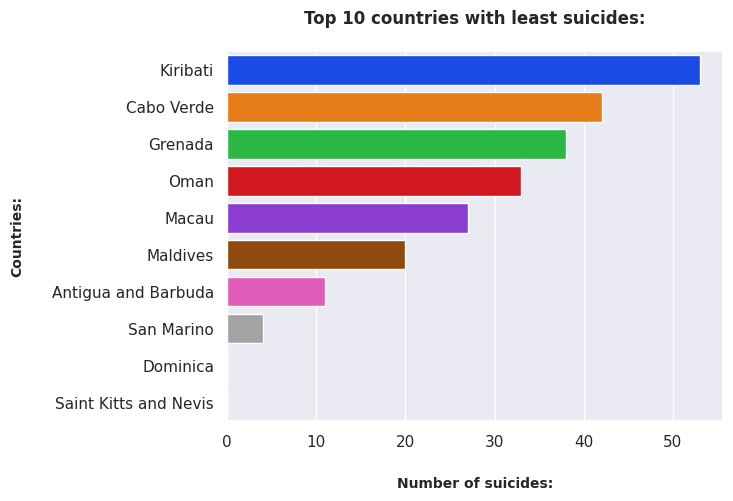

In [29]:
sns.barplot(data= a.tail(10), y= "country", x= "suicides_no", hue= "country", legend= False, palette="bright", saturation=0.8)
plt.gca().xaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.title("Top 10 countries with least suicides:", fontweight= "bold", pad= 20)
plt.xlabel("Number of suicides:", fontweight= "bold", labelpad= 20, fontsize= 10)
plt.ylabel("Countries:", fontweight= "bold", labelpad= 20, fontsize= 10)
plt.show()

This shows that again `Saint Kitts and Nevis`, `Dominica` and `San Marino`; West Indian Islantic countries have the least suicide rate where `Saint Kitts and Nevis`, `Dominica` having almost no suicides.

In [30]:
daar= data.groupby(by= "country")["suicides/100kpop"].mean().reset_index().sort_values(by= "suicides/100kpop", ascending= False)
daar

,country,suicides/100kpop
52,Lithuania,40.415573
87,Sri Lanka,35.295152
75,Russian Federation,34.892377
40,Hungary,32.761516
11,Belarus,31.075913
...,...,...
65,Oman,0.736111
1,Antigua and Barbuda,0.552901
45,Jamaica,0.521765
27,Dominica,0.000000


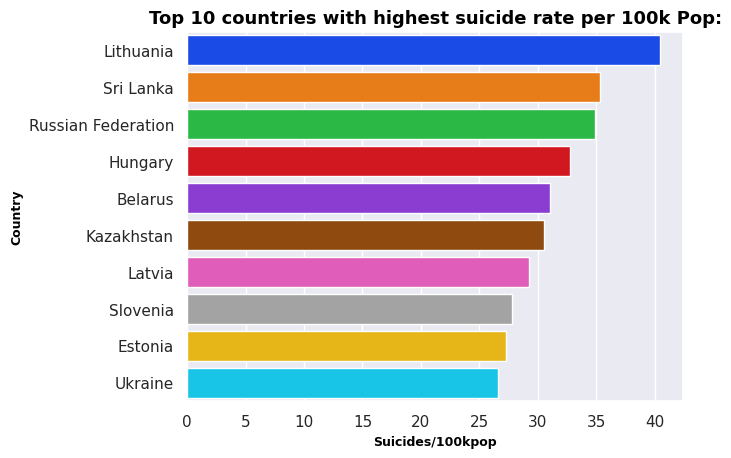

In [31]:
sns.barplot(data= daar.head(10), x= "suicides/100kpop", y= "country", hue= "country", palette= "bright", legend= False, saturation=0.8)
plt.title("Top 10 countries with highest suicide rate per 100k Pop:", fontsize= 13, fontweight= "bold", color= "black")
plt.xlabel("Suicides/100kpop", fontsize= 9, fontweight= "bold", color= "black")
plt.ylabel("Country", fontsize= 9, fontweight= "bold", color= "black")
plt.show()

This plot shows that `Lithuania`, `Sri Lanka`, `Russia` and `Hungary` have the most higest suicide rate per 100k population. 

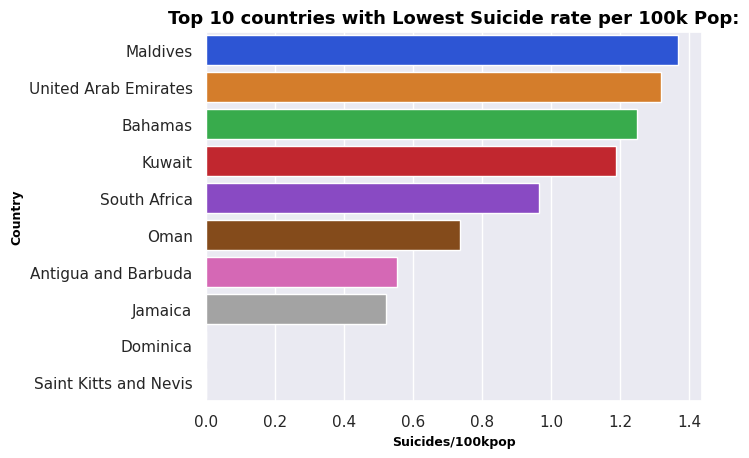

In [32]:
sns.barplot(data= daar.tail(10), x= "suicides/100kpop", y= "country", hue= "country", palette= "bright", legend= False, saturation=0.66)
plt.title("Top 10 countries with Lowest Suicide rate per 100k Pop:", fontsize= 13, color= "black", fontweight= "bold",)
plt.xlabel("Suicides/100kpop", fontsize= 9, fontweight= "bold", color= "black")
plt.ylabel("Country", fontsize= 9, fontweight= "bold", color= "black")
plt.show()

This shows that `Saint Kitts Nevis` and `Dominica` have very low (almost zero) suicide rate per 100k population. 

In [33]:
pivt= data.groupby(by= ["year", "country"])["suicides/100kpop"].mean().round(2).reset_index().sort_values(by= "year", ascending= True)
pivt.head()

,year,country,suicides/100kpop
0,1985,Antigua and Barbuda,0.00
17,1985,Greece,4.85
18,1985,Grenada,2.09
19,1985,Iceland,14.25
20,1985,Ireland,8.51


In [34]:
pivt["country"].unique()

array(['Antigua and Barbuda', 'Greece', 'Grenada', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Spain', 'Austria', 'Bahamas',
       'Bahrain', 'Barbados', 'Belgium', 'Brazil', 'Argentina', 'Japan',
       'New Zealand', 'Netherlands', 'Mexico', 'Mauritius', 'Malta',
       'Luxembourg', 'Kuwait', 'Panama', 'Canada', 'Colombia', 'Chile',
       'Dominica', 'Ecuador', 'France', 'Costa Rica', 'Paraguay',
       'Portugal', 'Puerto Rico', 'Republic of Korea',
       'Saint Vincent and Grenadines', 'Seychelles', 'Singapore',
       'Bulgaria', 'Australia', 'Thailand', 'Suriname', 'United Kingdom',
       'United States', 'Uruguay', 'Trinidad and Tobago', 'Sri Lanka',
       'Saint Lucia', 'Norway', 'Belize', 'Guatemala', 'Albania',
       'Finland', 'Sweden', 'Ukraine', 'Turkmenistan', 'Guyana',
       'Russian Federation', 'Romania', 'Belarus', 'Azerbaijan',
       'Uzbekistan', 'Saint Kitts and Nevis', 'Poland', 'Armenia',
       'Germany', 'Georgia', 'El Salvador', 'Czech

Now, we can access the data for a particular `Country` for a particular `year`. For Example in `2016`, the suicides/100k pop in `US` can be obtained as:

In [35]:
pivt[(pivt["country"]== "United States") & (pivt["year"]== 2015)]

,year,country,suicides/100kpop
2303,2015,United States,14.62


In [36]:
pivt[(pivt["country"]== "Denmark") & (pivt["year"]== 2011)]

,year,country,suicides/100kpop
1941,2011,Denmark,10.53


In [37]:
pvt= pivt.groupby(by= ["country", "year"])["suicides/100kpop"].mean().round(2).reset_index()
pvt

,country,year,suicides/100kpop
0,Albania,1987,2.65
1,Albania,1988,2.70
2,Albania,1989,2.78
3,Albania,1992,1.50
4,Albania,1993,2.71
...,...,...,...
2316,Uzbekistan,2010,5.27
2317,Uzbekistan,2011,5.60
2318,Uzbekistan,2012,6.46
2319,Uzbekistan,2013,6.57


In [38]:
pvt[pvt["country"]== "Albania"]

,country,year,suicides/100kpop
0,Albania,1987,2.65
1,Albania,1988,2.70
2,Albania,1989,2.78
3,Albania,1992,1.50
4,Albania,1993,2.71
5,Albania,1994,2.68
6,Albania,1995,3.38
7,Albania,1996,3.64
8,Albania,1997,6.45
9,Albania,1998,5.54


<Axes: xlabel='year', ylabel='suicides/100kpop'>

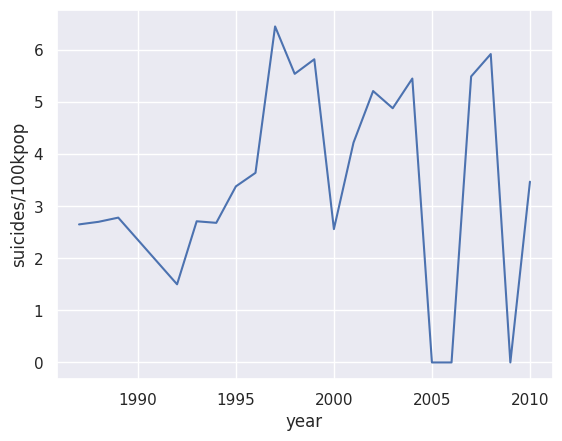

In [39]:
sns.lineplot(x= pvt[pvt["country"]== "Albania"]["year"], y= pvt[pvt["country"]== "Albania"]["suicides/100kpop"], legend= True)

<Axes: xlabel='year', ylabel='suicides/100kpop'>

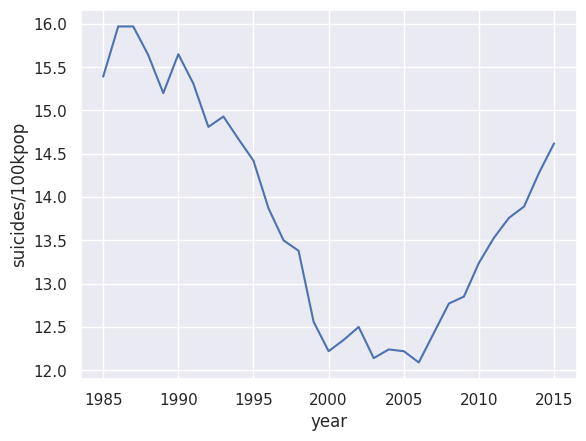

In [40]:
sns.lineplot(x= pvt[pvt["country"]== "United States"]["year"], y= pvt[pvt["country"]== "United States"]["suicides/100kpop"], legend= True)

If we want to plot all the yearly trend of suicide rates per country then:

In [41]:
data["country"].nunique()

101

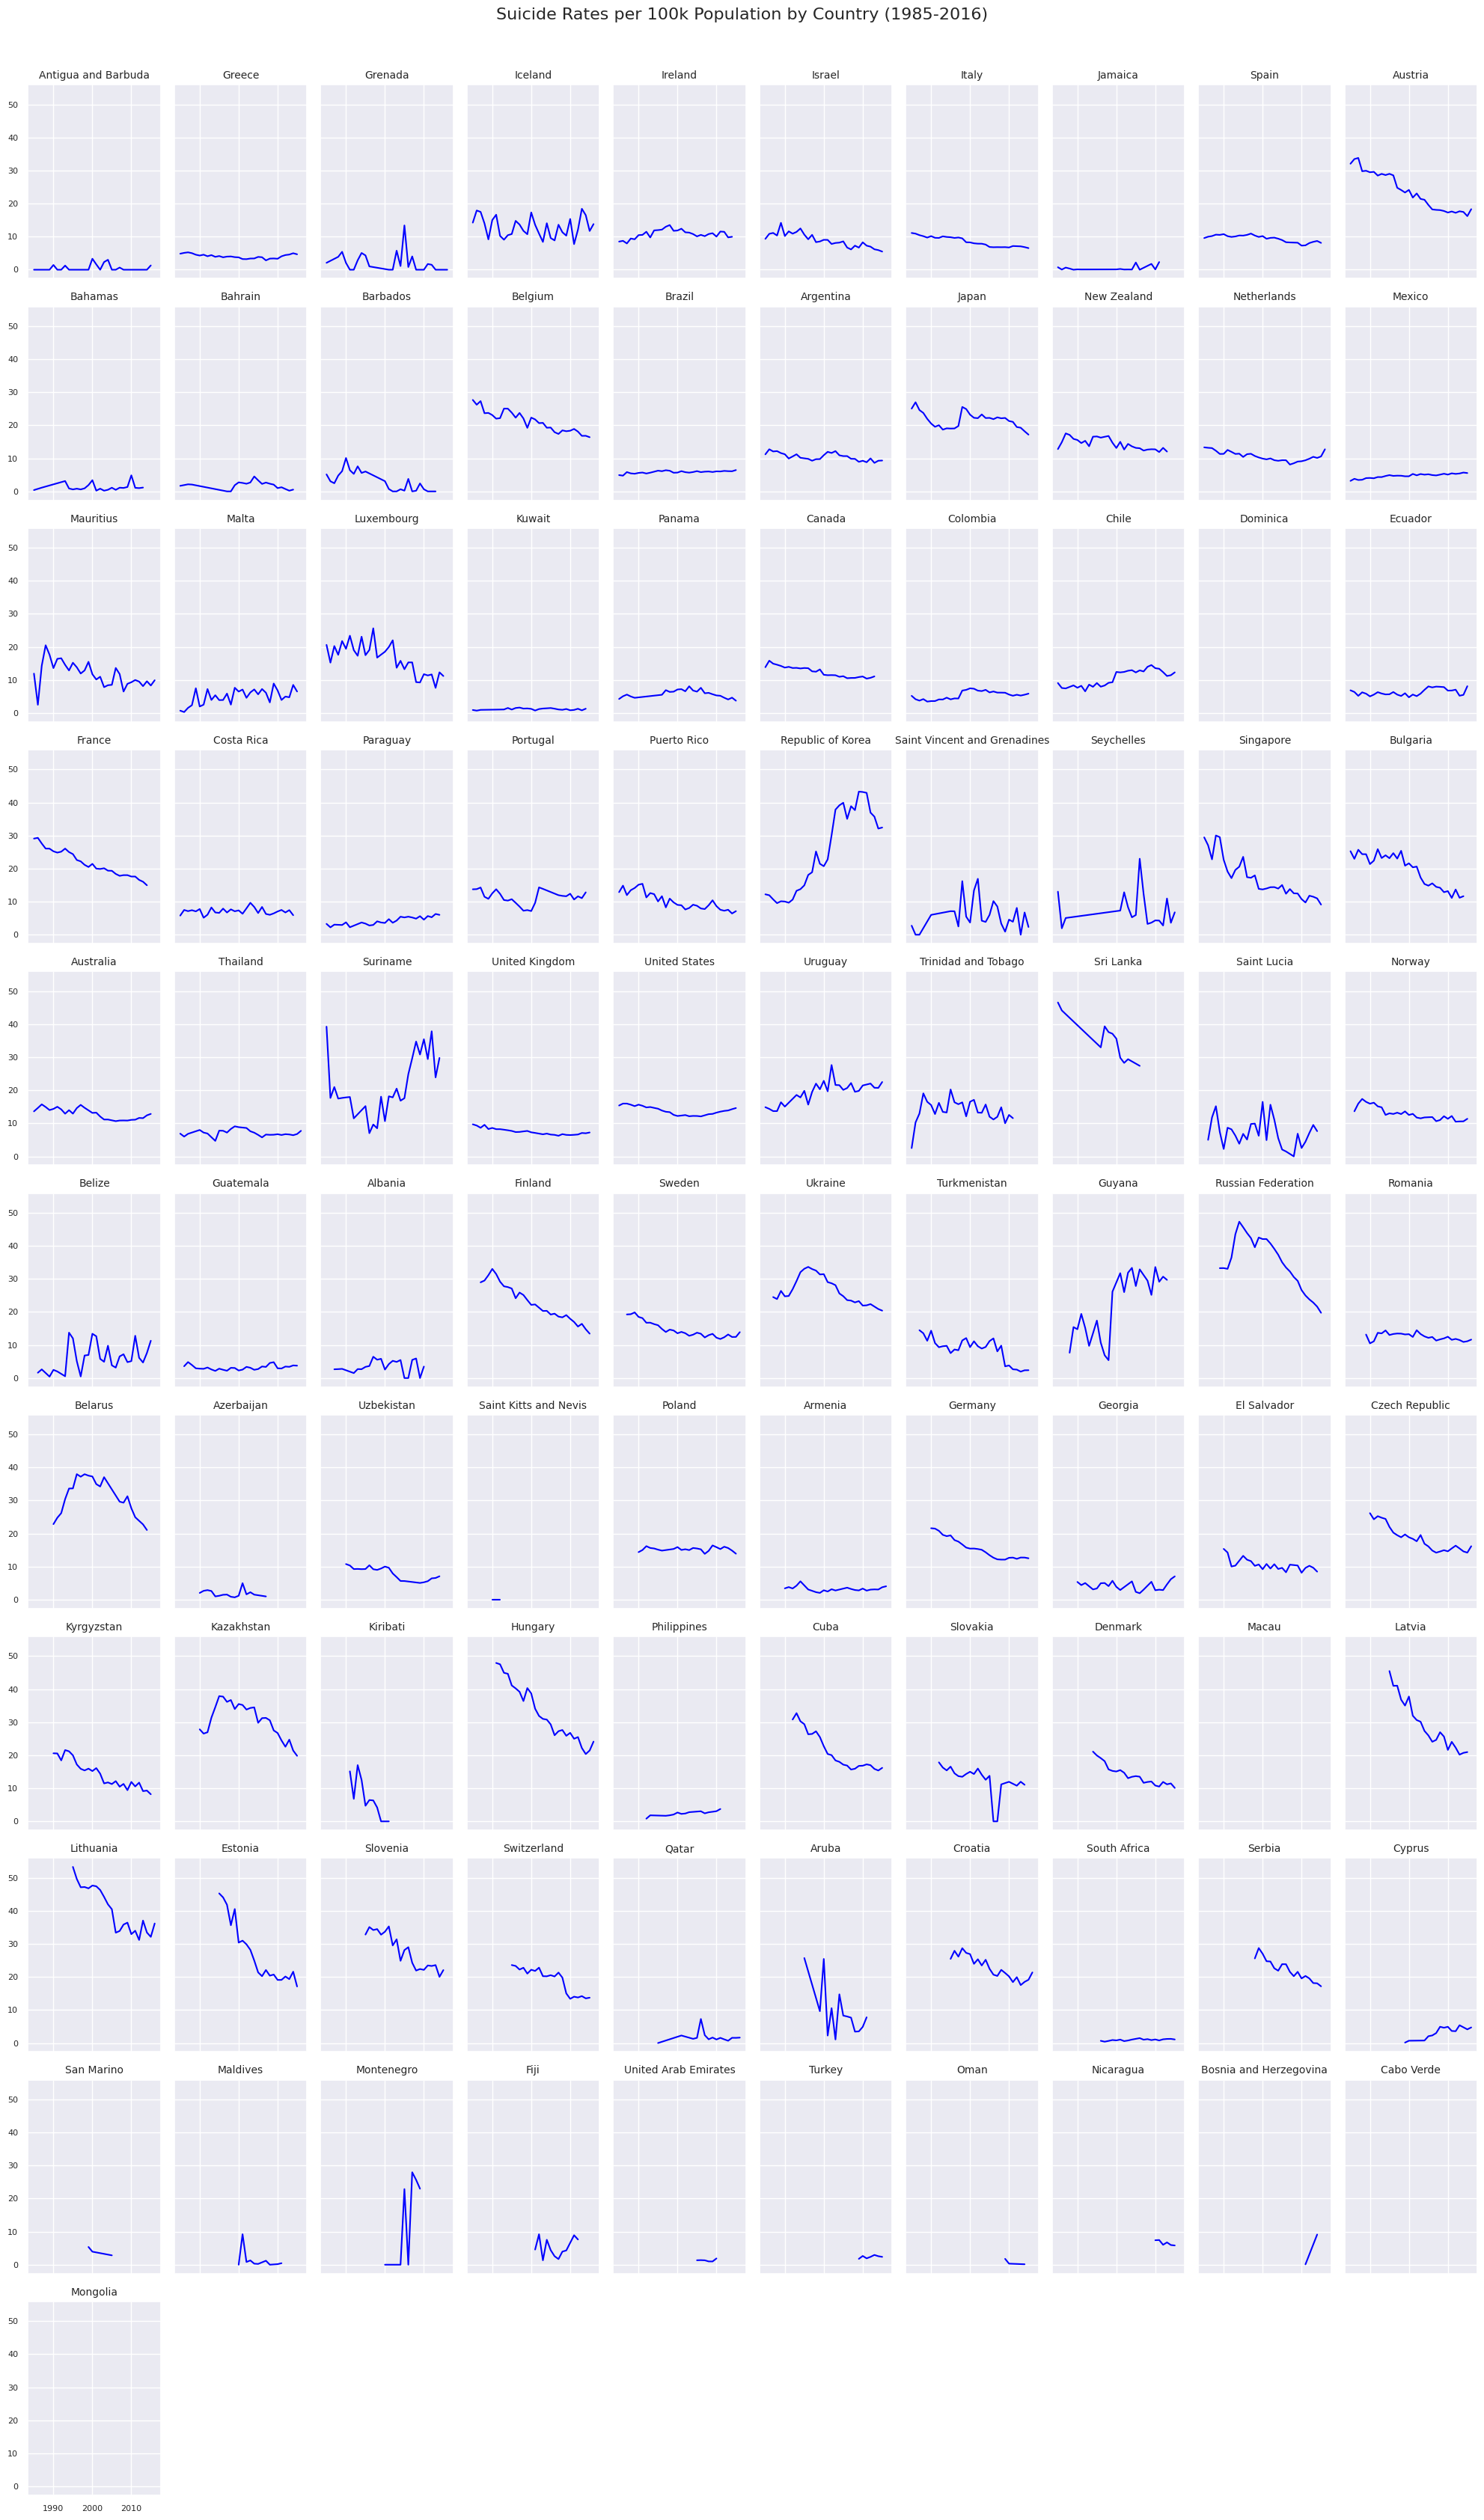

In [42]:
import matplotlib.pyplot as plt
import math

# Get the list of unique countries
countries = pivt["country"].unique()

# Calculate the grid size for subplots
num_countries = len(countries)
cols = 10  # Number of columns
rows = math.ceil(num_countries / cols)  # Number of rows

# Create the subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each country's data in a subplot
for i, country in enumerate(countries):
    country_data = pivt[pivt["country"] == country]
    axes[i].plot(country_data["year"], country_data["suicides/100kpop"], label=country, color='blue')
    axes[i].set_title(country, fontsize=10)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.suptitle("Suicide Rates per 100k Population by Country (1985-2016)", fontsize=16, y=1.02)
plt.show()

### 7. **Trend by Sex Over Time:**

In [43]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent'],
      dtype='object')

In [44]:
da_s_yr= data.groupby(by= ["sex", "year"])["suicides/100kpop"].mean().round(2).reset_index()
da_s_yr

,sex,year,suicides/100kpop
0,female,1985,5.78
1,female,1986,5.81
2,female,1987,5.73
3,female,1988,6.32
4,female,1989,6.18
...,...,...,...
59,male,2012,18.32
60,male,2013,17.85
61,male,2014,17.56
62,male,2015,17.53


<Axes: xlabel='year', ylabel='suicides/100kpop'>

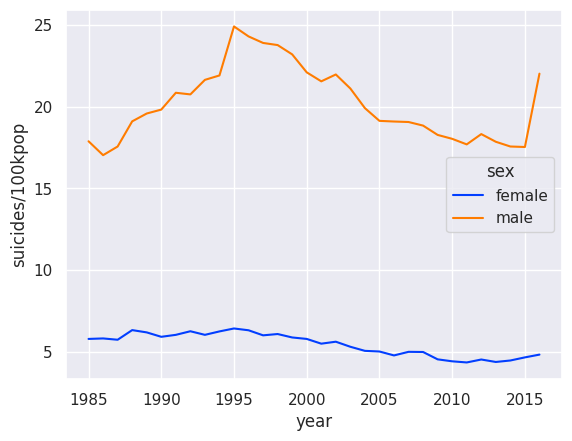

In [45]:
sns.lineplot(data= da_s_yr, x= "year", y= "suicides/100kpop", hue= "sex", palette= "bright")

The plot shows the trend of suicide rates (`suicides/100kpop`) for males and females over the years (1985–2016).

1. **Male Suicide Rates**:
   - The suicide rate for males is significantly higher than for females throughout the entire time period.

   - The rate peaks around the mid-1990s, reaching approximately 25 suicides per 100k population.

   - After the peak, there is a gradual decline in male suicide rates, with some fluctuations, until 2010. A slight increase is observed after 2015.

2. **Female Suicide Rates**:
   - The suicide rate for females remains consistently lower than that for males, staying below 5 suicides per 100k population.

   - There is a slight decline in female suicide rates over the years, with minimal fluctuations.

3. **Gender Disparity**:
   - The disparity between male and female suicide rates is evident, with male rates being approximately 4–5 times higher than female rates.

   - This suggests that males are at a significantly higher risk of suicide compared to females.

4. **Temporal Trends**:
   - Both male and female suicide rates show a general decline after the mid-1990s, which could indicate improvements in mental health awareness, interventions, or other societal changes.

   - The sharp increase in male suicide rates in the mid-1990s may be linked to specific global or regional events, such as economic crises or social changes.

- **Males** are more vulnerable to suicide, possibly due to societal pressures, stigma around seeking help, or other gender-specific factors.

- The decline in rates after the 1990s may reflect the impact of mental health initiatives or changes in reporting practices.

> Focus on targeted mental health interventions for males, addressing societal pressures and encouraging help-seeking behavior.
 
> Continue monitoring trends to identify and address emerging issues, especially for males.

### 8. **Age Group Trends Over Years**

In [46]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent'],
      dtype='object')

In [47]:
# Using Average Values:
sore= data.groupby(by= ["year", "age"])["suicides/100kpop"].mean().round(2).reset_index()
sore.head(5)

,year,age,suicides/100kpop
0,1985,15-24,8.43
1,1985,25-34,10.01
2,1985,35-54,12.40
3,1985,5-14,0.54
4,1985,55-74,15.09


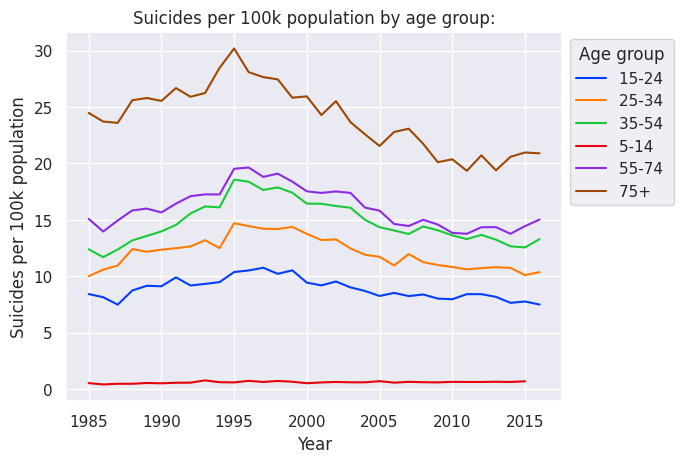

In [48]:
sns.lineplot(data= sore, x= "year", y= "suicides/100kpop", hue= "age", palette= "bright", legend= "full")
plt.title("Suicides per 100k population by age group:")
plt.xlabel("Year")
plt.ylabel("Suicides per 100k population") 
plt.legend(title= "Age group", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [49]:
# Using Sum:
sore= data.groupby(by= ["year", "age"])["suicides/100kpop"].sum().round(2).reset_index()
sore.head(5)

,year,age,suicides/100kpop
0,1985,15-24,809.25
1,1985,25-34,960.84
2,1985,35-54,1190.69
3,1985,5-14,51.56
4,1985,55-74,1449.06


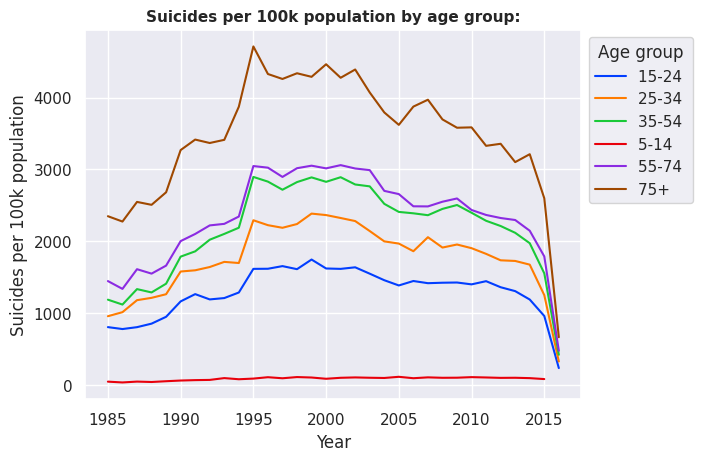

In [50]:
sns.lineplot(data= sore, x= "year", y= "suicides/100kpop", hue= "age", palette= "bright", legend= "full")
plt.title("Suicides per 100k population by age group:", fontsize= 11, fontweight= "bold")
plt.xlabel("Year")
plt.ylabel("Suicides per 100k population") 
plt.legend(title= "Age group", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### 9. **Suicides per Generation Over Time:**

In [51]:
data.head(4)

,country,year,sex,age,suicides_no,population,suicides/100kpop,country-year,HDIforyear,gdp_for_year(),gdp_per_capita(),generation,continent
0,Albania,1987,male,15-24,21,312900,6.71,Albania-1987,0.828088,2156624900,796,Generation X,Europe
1,Albania,1987,male,35-54,16,308000,5.19,Albania-1987,0.828088,2156624900,796,Silent,Europe
2,Albania,1987,female,15-24,14,289700,4.83,Albania-1987,0.828088,2156624900,796,Generation X,Europe
3,Albania,1987,male,75+,1,21800,4.59,Albania-1987,0.828088,2156624900,796,G.I. Generation,Europe


In [52]:
# Calculate the total suicides per generation per year:
dp_per= data.groupby(by= ["generation", "year"])["suicides_no"].sum()
dp_per= dp_per.reset_index()
dp_per

,generation,year,suicides_no
0,Boomers,1985,20771
1,Boomers,1986,21685
2,Boomers,1987,22309
3,Boomers,1988,21332
4,Boomers,1989,29427
...,...,...,...
141,Silent,2012,24578
142,Silent,2013,24153
143,Silent,2014,24865
144,Silent,2015,23114


In [53]:
# To check if our grouping logic is doing fine:
data[(data['generation'] == "Boomers") & (data["year"]== 1985)]["suicides_no"].sum()

np.int64(20771)

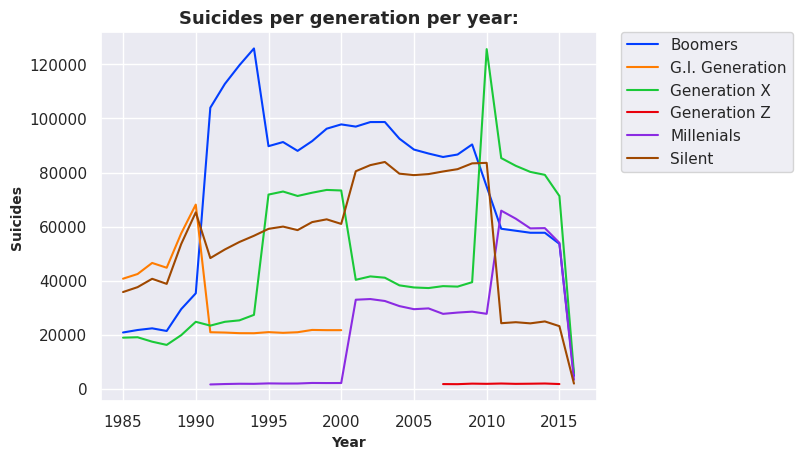

In [54]:
sns.lineplot(data= dp_per, x= "year", y= "suicides_no", hue= "generation", palette= "bright", legend= "full")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Suicides per generation per year:", fontsize= 13, fontweight= "bold")
plt.xlabel("Year", fontsize= 10, fontweight= "bold")
plt.ylabel("Suicides", fontsize= 10, fontweight= "bold")
plt.show()

In [55]:
# Calculate the total suicides per generation per year:
dp_per= data.groupby(by= ["generation", "year"])["suicides_no"].mean().round(2)
dp_per= dp_per.reset_index()
dp_per

,generation,year,suicides_no
0,Boomers,1985,216.36
1,Boomers,1986,225.89
2,Boomers,1987,206.56
3,Boomers,1988,217.67
4,Boomers,1989,282.95
...,...,...,...
141,Silent,2012,151.72
142,Silent,2013,150.96
143,Silent,2014,159.39
144,Silent,2015,186.40


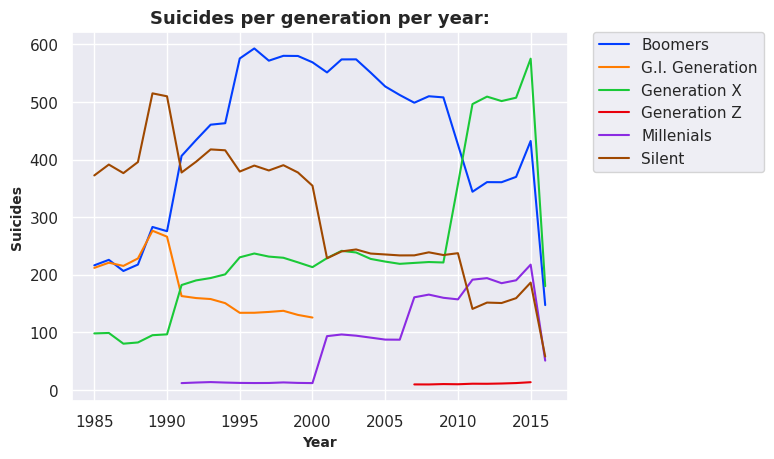

In [56]:
sns.lineplot(data= dp_per, x= "year", y= "suicides_no", hue= "generation", palette= "bright", legend= "full", markers='auto')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Suicides per generation per year:", fontsize= 13, fontweight= "bold")
plt.xlabel("Year", fontsize= 10, fontweight= "bold")
plt.ylabel("Suicides", fontsize= 10, fontweight= "bold")
plt.show()

> **`Note:`** If I use `sum()` then, it takes the total `suicides_no` per generation per year and, if I use `mean()` then it takes the average `suicides_no` per generation per year.

### 10. **Year-over-Year % Change in Suicides:** 

In [57]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent'],
      dtype='object')

In [58]:
# To calculate year-to-year % change in total suiciides:
# Calculate the % change in total suicides for each year: 

In [59]:
# First group by year to get total suicides per year
yearly_suicides = data.groupby('year')['suicides_no'].sum().reset_index()

# Calculate the percentage change
yearly_suicides['pct_change'] = yearly_suicides['suicides_no'].pct_change() * 100

# Round to 2 decimal places
yearly_suicides['pct_change'] = yearly_suicides['pct_change'].round(2)

# To display the results
print("Year-to-Year Percentage Change in Total Suicides:")
print(yearly_suicides)

Year-to-Year Percentage Change in Total Suicides:
    year  suicides_no  pct_change
0   1985       116063         NaN
1   1986       120670        3.97
2   1987       126842        5.11
3   1988       121026       -4.59
4   1989       160244       32.40
5   1990       193361       20.67
6   1991       198020        2.41
7   1992       211473        6.79
8   1993       221565        4.77
9   1994       232063        4.74
10  1995       243544        4.95
11  1996       246725        1.31
12  1997       240745       -2.42
13  1998       249591        3.67
14  1999       256119        2.62
15  2000       255832       -0.11
16  2001       250652       -2.02
17  2002       256095        2.17
18  2003       256079       -0.01
19  2004       240861       -5.94
20  2005       234375       -2.69
21  2006       233361       -0.43
22  2007       233408        0.02
23  2008       235447        0.87
24  2009       243487        3.41
25  2010       238702       -1.97
26  2011       236484       -0.9

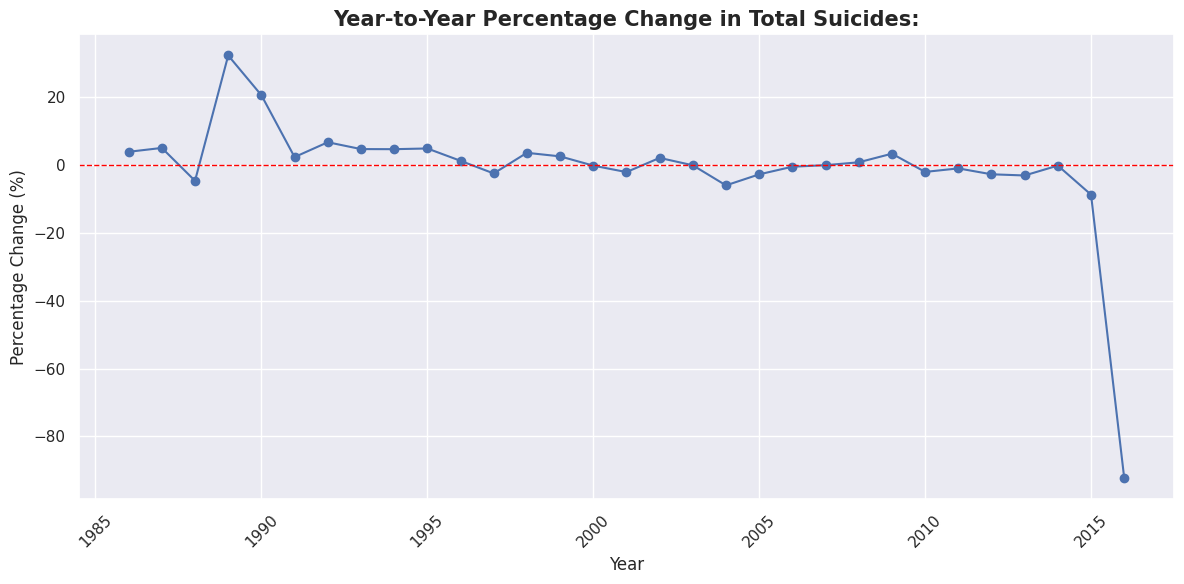

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_suicides['year'], yearly_suicides['pct_change'], marker='o')
plt.title('Year-to-Year Percentage Change in Total Suicides:', fontsize= 15, fontweight= "bold")
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

During 1987 to 1993, there is sudden increase in Suicides where there is huge decline in rates after 2014.

-----
---
---

## **C. DEMOGRAPHIC ANALYSIS:**

### 11. **Male vs Female Suicide Counts by Age:**

In [61]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent'],
      dtype='object')

In [62]:
# Group by sex and year and compare counts:
grouped_data= data.groupby(by= ['sex', 'age'])["suicides_no"].sum().reset_index()#.pivot(index='sex', columns='age')

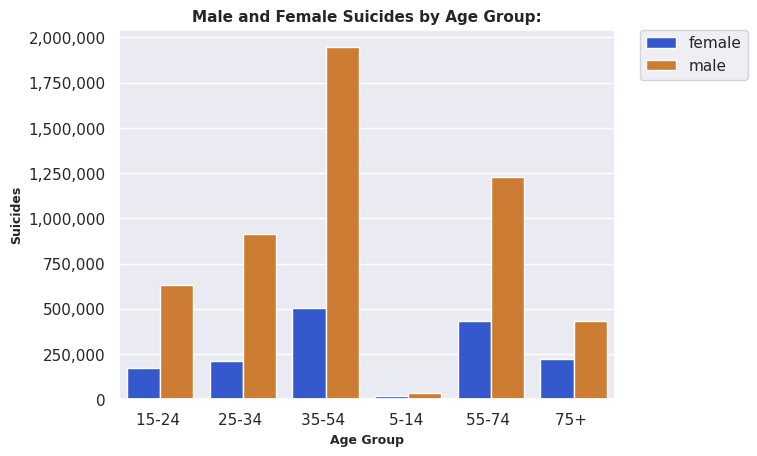

In [63]:
sns.barplot(data= grouped_data, x= "age", y= "suicides_no", hue= "sex", palette= "bright", legend= True, saturation= 0.6)
plt.title("Male and Female Suicides by Age Group:", fontsize= 11, fontweight= "bold")
plt.xlabel("Age Group", fontsize= 9, fontweight= "bold")
plt.ylabel("Suicides", fontsize= 9, fontweight= "bold")
# PLot legebd outside the plot:
plt.legend(bbox_to_anchor= (1.05, 1), loc= "upper left", borderaxespad= 0)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

So, I find that males are highly vulnerable to suicides and males from 35-54 age group are extremely vulnerable to suicides, the numbers are very high for this age group suggesting some immediate intervensions for males in 35-54.

In [64]:
# Group by sex and year and compare counts:
grouped_data= data.groupby(by= ['sex', 'age'])["suicides/100kpop"].mean().reset_index()#.pivot(index='sex', columns='age')
grouped_data

,sex,age,suicides/100kpop
0,female,15-24,4.328018
1,female,25-34,4.573210
2,female,35-54,5.916480
3,female,5-14,0.462252
4,female,55-74,7.123447
5,female,75+,9.919802
6,male,15-24,13.566290
7,male,25-34,19.800560
8,male,35-54,23.978402
9,male,5-14,0.777831


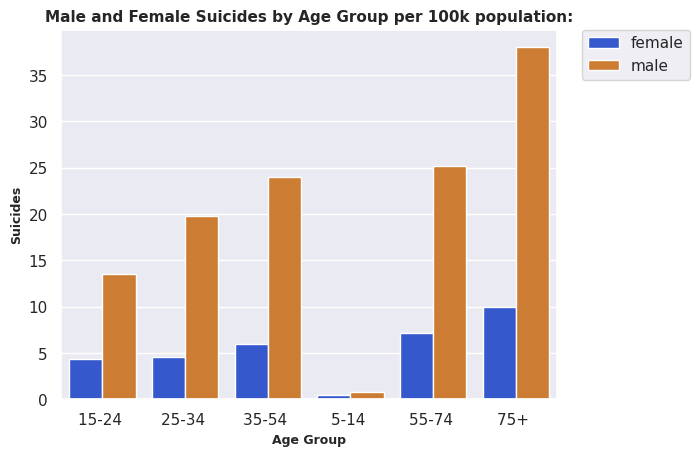

In [65]:
sns.barplot(data= grouped_data, x= "age", y= "suicides/100kpop", hue= "sex", palette= "bright", legend= True, saturation= 0.6)
plt.title("Male and Female Suicides by Age Group per 100k population:", fontsize= 11, fontweight= "bold")
plt.xlabel("Age Group", fontsize= 9, fontweight= "bold")
plt.ylabel("Suicides", fontsize= 9, fontweight= "bold")
# PLot legebd outside the plot:
plt.legend(bbox_to_anchor= (1.05, 1), loc= "upper left", borderaxespad= 0)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

If we take population into consideration, then males in age group 75+ are more vulnerable to suicides as about 50 suicides per 100k males in this age group committe suicide.

### 12. **Population vs Suicide Rate Correlation:**

In [69]:
print(data.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent'],
      dtype='object')


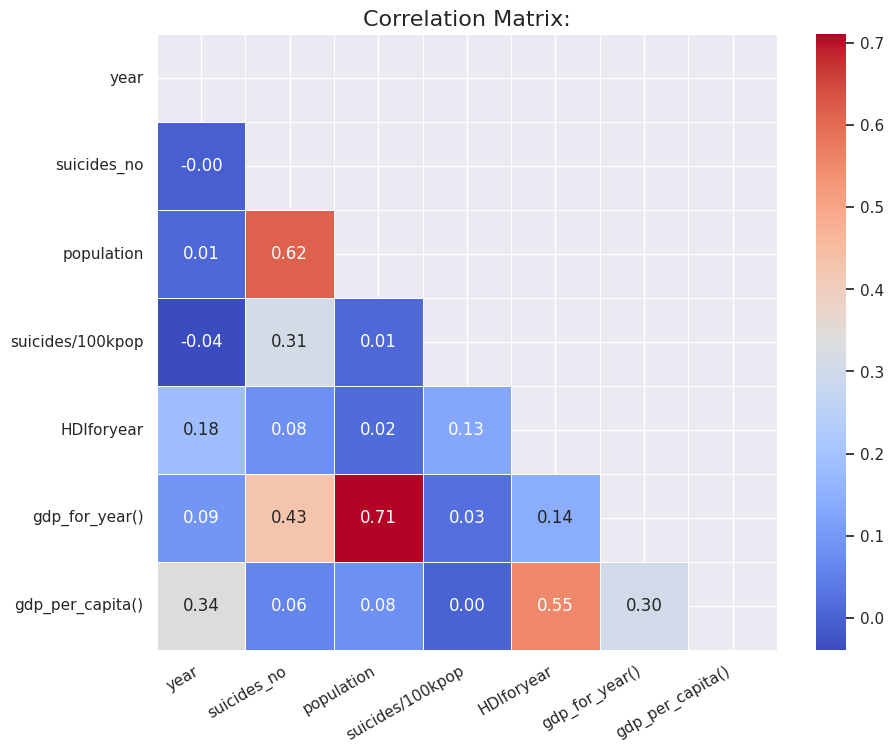

In [87]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a mask for the upper triangle:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with the mask
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm' , fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix:', fontsize=16)
plt.xticks(rotation=30, ha='right')
plt.show()

- There is a strong positive correlation between the total number of suicides (`suicides_no`) and the population size. This suggests that larger populations tend to have higher absolute numbers of suicides, which is expected.

- A strong positive correlation exists between GDP for the year and population. This indicates that countries with larger populations tend to have higher total GDP.

- A moderate positive correlation exists between GDP per capita and total GDP. This suggests that wealthier countries (in terms of GDP per capita) also tend to have higher total GDP.

- A weak positive correlation exists between the suicide rate per 100k population and the total number of suicides. This indicates that higher suicide rates are somewhat associated with higher absolute numbers of suicides.

- Larger populations are associated with higher total suicides and GDP, but the suicide rate per 100k population is not strongly influenced by population size.

- Wealthier countries (higher GDP per capita) tend to have better HDI scores, but the correlation is not very strong.

- The weak correlation between `suicides/100kpop` and other variables suggests that suicide rates are influenced by factors beyond population size or GDP.

### 13. **HDI vs Suicide Rate:**

- If the `correlation is negative and significant`, it suggests that `higher human development (HDI) is associated with lower suicide rates`.

- If the `correlation is weak or positive`, it indicates that `HDI may not have a strong inverse effect on suicide rates`, and other factors might be influencing the rates.

In [88]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent'],
      dtype='object')

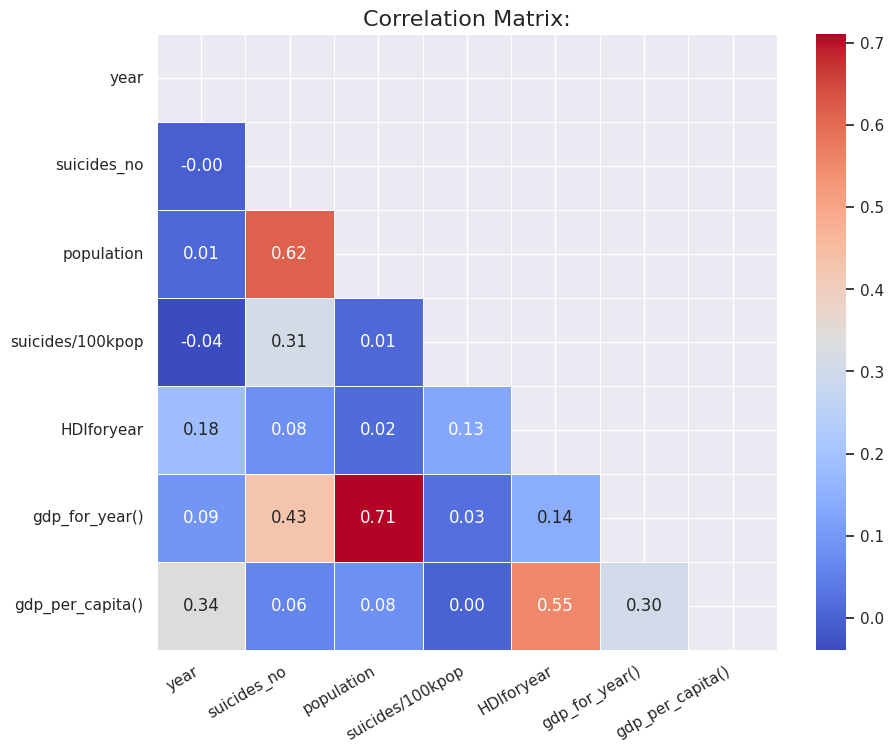

In [92]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a mask for the upper triangle:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with the mask
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm' , fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix:', fontsize=16)
plt.xticks(rotation=30, ha='right')
plt.show()

In [94]:
yhds= data[["HDIforyear", "suicides/100kpop"]]
# calculate correlatio between HDIforyear and suicides/100kpop
yhds.corr()

,HDIforyear,suicides/100kpop
HDIforyear,1.000000,0.129258
suicides/100kpop,0.129258,1.000000


From this, we see that the `correlation is weak positive`, indicating `HDI may not have a strong inverse effect on suicide rates`, and other factors might be influencing the rates.

This can be seen with a scatter plot with best-fit line:

Correlation between HDI for year and suicides/100kpop: 0.13


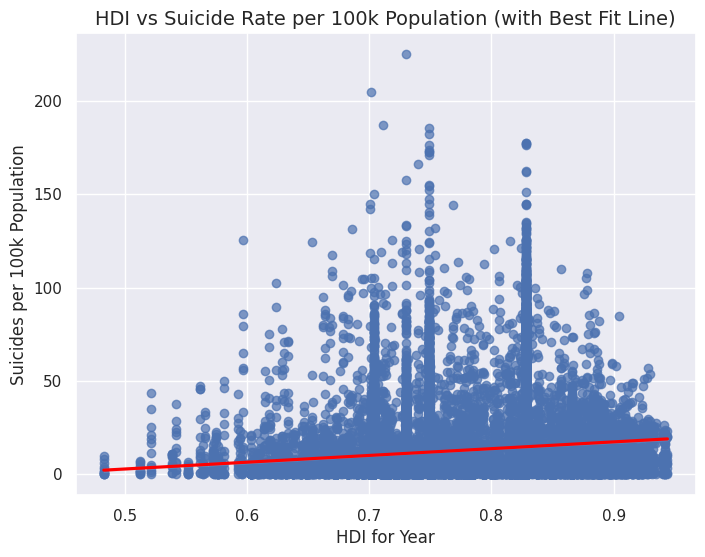

In [99]:
hdi_suicide_data = data[['HDIforyear', 'suicides/100kpop']].dropna()

# Calculate the correlation
correlation = hdi_suicide_data.corr().iloc[0, 1]
print(f"Correlation between HDI for year and suicides/100kpop: {correlation:.2f}")

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(data=hdi_suicide_data, x='HDIforyear', y='suicides/100kpop', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('HDI vs Suicide Rate per 100k Population (with Best Fit Line)', fontsize=14)
plt.xlabel('HDI for Year')
plt.ylabel('Suicides per 100k Population')
plt.grid(True)
plt.show()

### 14. **GDP per Capita vs Suicide Rate:**

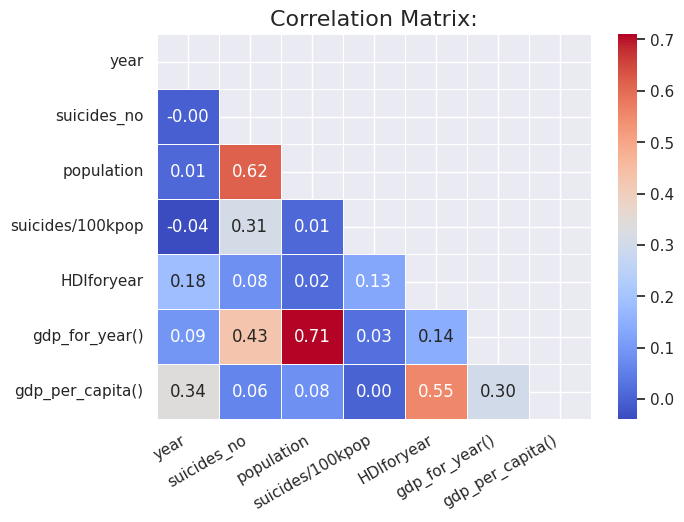

In [108]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a mask for the upper triangle:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with the mask
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm' , fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix:', fontsize=16)
plt.xticks(rotation=30, ha='right')
plt.show()

From correlation metrix, I do not find any significant relation between `gdp_per_capita()` and `suicides/100kpop`; infact there is perfectly no correlation between them indicating there are some other factors influencing suicides.

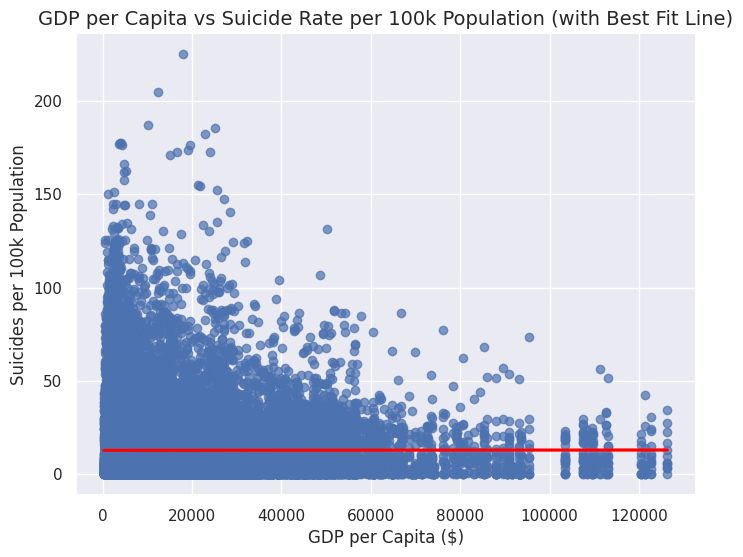

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(data=data, x='gdp_per_capita()', y='suicides/100kpop', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('GDP per Capita vs Suicide Rate per 100k Population:', fontsize=14)
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Suicides per 100k Population')
plt.grid(True)
plt.show()

Even though, best fit line is flat, scatterplot indicates there is a pattern that indicates as the GDP per Capita increases, the suicides/100kpop decreases indicating wealth do have influence in suicides rate.

### 15. **Sex-wise Suicide Rate within Generations:**

In [103]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent'],
      dtype='object')

In [104]:
data.head(3)

,country,year,sex,age,suicides_no,population,suicides/100kpop,country-year,HDIforyear,gdp_for_year(),gdp_per_capita(),generation,continent
0,Albania,1987,male,15-24,21,312900,6.71,Albania-1987,0.828088,2156624900,796,Generation X,Europe
1,Albania,1987,male,35-54,16,308000,5.19,Albania-1987,0.828088,2156624900,796,Silent,Europe
2,Albania,1987,female,15-24,14,289700,4.83,Albania-1987,0.828088,2156624900,796,Generation X,Europe


In [107]:
datta= data.groupby(by= ["generation", "sex"])["suicides/100kpop"].mean().round(2).reset_index()
datta

,generation,sex,suicides/100kpop
0,Boomers,female,5.82
1,Boomers,male,23.67
2,G.I. Generation,female,10.98
3,G.I. Generation,male,36.91
4,Generation X,female,4.26
5,Generation X,male,16.86
6,Generation Z,female,0.53
7,Generation Z,male,0.75
8,Millenials,female,2.52
9,Millenials,male,8.24


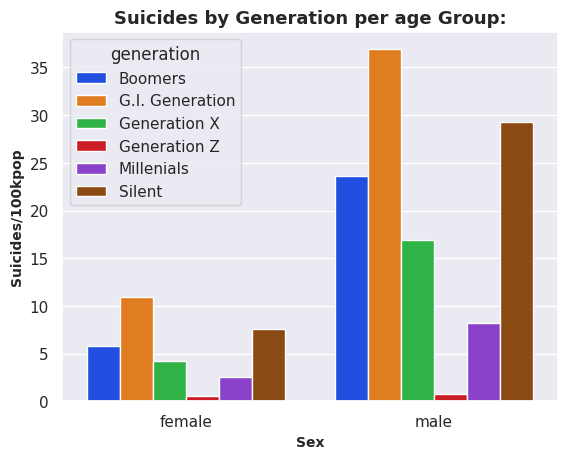

In [113]:
import matplotlib.pyplot as plt
sns.barplot(data= datta, x= "sex", y= "suicides/100kpop", hue= "generation", palette= "bright", )
plt.title("Suicides by Generation per age Group:", fontsize= 13,  fontweight= "bold")
plt.xlabel("Sex", fontsize= 10, fontweight= "bold")
plt.ylabel("Suicides/100kpop", fontsize= 10, fontweight= "bold")
plt.show()

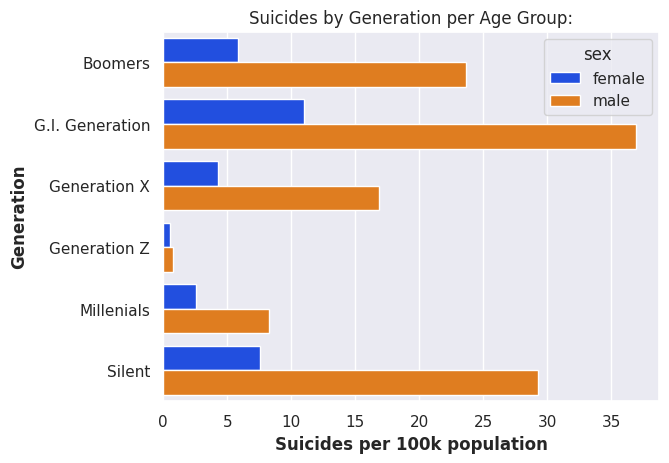

In [114]:
import matplotlib.pyplot as plt
sns.barplot(data= datta, hue= "sex", x= "suicides/100kpop", y= "generation", palette= "bright", )
plt.title("Suicides by Generation per Age Group:")
plt.xlabel("Suicides per 100k population",  fontsize= 12, fontweight= "bold")
plt.ylabel("Generation", fontsize= 12, fontweight= "bold")
plt.show()

- `Males` have significantly higher suicide rates across all generations compared to females. 

- The `Silent Generation` and `G.I. Generation` males exhibit the highest suicide rates, exceeding 30 suicides per 100k population. 

- Females across all generations have much lower rates, with minimal variation. 

This highlights a `strong gender disparity` in suicide rates, particularly among older generations.

----

## **D. GEOGRAPHICAL ANALYSIS:**

### 16. **Global Suicide Distribution Map:**
- **How:** Aggregate suicide rates by `country`, map them.
- **Inference:** Visually detect hotspots around the world.

In [ ]:
data.columns 


### 17. **Continent-Level Aggregation**
- **How:** Map countries to continents manually, then aggregate.
- **Inference:** Regional differences in culture or policy might explain trends.



### 18. **High-Income vs Low-Income Countries**
- **How:** Categorize countries based on income levels, then compare suicide rates.
- **Inference:** Examine how economic well-being affects suicide.



### 19. **Post-Soviet States Suicide Patterns**
- **How:** Focus on former USSR countries.
- **Inference:** Explore how transitions affected mental health and suicide.



### 20. **War-affected vs Peaceful Countries**
- **How:** Compare suicide rates in countries with recent conflicts vs. stable ones.
- **Inference:** Investigate the psychological toll of unrest.

---



## 🔹 **COMPARATIVE ANALYSIS**

### 21. **Country-Year Suicide Rate Comparison**
- **How:** Compare suicide rates across different countries in a single year.
- **Inference:** Highlights outliers and successful interventions.



### 22. **Top 5 Countries Over Time**
- **How:** Identify top 5 suicide rate countries each year, visualize trend lines.
- **Inference:** Shows persistent issues or improvements over time.



### 23. **Gender Ratio of Suicides**
- **How:** Divide male suicide count by female suicide count per country/year.
- **Inference:** A high ratio may reflect gender-specific societal pressures.



### 24. **Generational Analysis per Country**
- **How:** Group by `generation` and `country`, sum suicides.
- **Inference:** Compare how different generations fare in different nations.



### 25. **Year with Maximum Global Suicides**
- **How:** Find the year with the highest summed `suicides_no`.
- **Inference:** Look into global context that year for potential causes.

---



## 🔹 **EXPLORATORY & ADVANCED SCENARIOS**

### 26. **Detect Anomalies in Suicide Trends**
- **How:** Use visualization or statistical methods to detect spikes or dips.
- **Inference:** Anomalies might relate to major events, disasters, or reforms.



### 27. **Cluster Countries by Suicide Profile**
- **How:** Use features like `suicides/100k pop`, `HDI`, `GDP`, `population`.
- **Inference:** Identify similar countries that might benefit from shared solutions.



### 28. **Compare Suicide Rate vs GDP Trends per Country**
- **How:** Line plot both variables over time for selected countries.
- **Inference:** Analyze economic influence on mental health.



### 29. **Suicide Contribution by Age within Country**
- **How:** Within each country, show what % each age group contributes to total suicides.
- **Inference:** Helps target mental health interventions by age.



### 30. **Evaluate Effect of Development Over Time**
- **How:** Compare how suicide rates evolve with GDP/HDI increases over decades.
- **Inference:** Validates or questions the assumption that development improves mental health.
